**Regresión lineal con una variable**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class datos:
  def __init__(self, X, y):
    self.cargar(X, y)
  def cargar(self, X, y):
    self.X = np.concatenate((np.ones((X.shape[0],1)),X) , axis = 1)
    self.y = y

In [6]:

X = np.random.randn(100,1)
y = 0.2*X+10+0.1*np.random.randn(100,1)

In [7]:
data = datos(X,y)

In [18]:
class LinearReg:
  def __init__(self, alpha, niter):
    self.alpha = alpha
    self.niter = niter
  def GradDesc(self, X, y):
    theta = np.zeros((2,1))
    m = X.shape[0]
    J = np.zeros((self.niter,1))
    for i in range(self.niter):
      theta = theta - self.alpha/m*(np.sum((np.dot(theta.T,X.T)-y.T)*X.T, axis = 1, keepdims = True))
      J[i] = (1/(2*m)*np.sum((np.dot(theta.T,X.T)-y.T)**2))
    return theta, J
  def predict(self, X):
    ypred = np.dot(np.concatenate((np.ones((X.shape[0],1)),X) , axis = 1),theta)
    return ypred

In [19]:
linear = LinearReg(alpha = 0.1, niter = 100)

In [20]:
theta, J = linear.GradDesc(data.X, data.y)

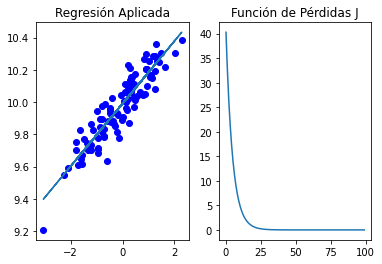

In [21]:
plt.subplot(1,2,1)
plt.title('Regresión Aplicada')
plt.plot(data.X[:,1],data.y, 'bo')
plt.plot(data.X[:,1], np.dot(data.X,theta))
plt.subplot(1,2,2)
plt.title('Función de Pérdidas J')
plt.plot(np.linspace(0,linear.niter-1,linear.niter), J)
plt.show()

In [24]:
ypred = linear.predict(np.array([[-2], [0] ,[2]]))
ypred

array([[ 9.60248677],
       [ 9.99056722],
       [10.37864768]])